In [1]:
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score #ordinary linear regression + w/ ridge regularization
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
Xy = pd.read_pickle('data_for_regression_20k.pkl')

In [24]:
Xy.shape

(21366, 64)

In [3]:
y_bi = Xy['country_USA_World_bi']
y_mlt = Xy['country_dest_id']   
X = Xy.drop(['country_dest_id','country_USA_World_bi'], axis = 1)

In [25]:
X.shape

(21366, 62)

In [4]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y_bi, test_size=0.2, 
                                                stratify=y_bi,random_state = 88)


In [26]:
Xtrain.shape

(17092, 62)

In [5]:
std_scale = StandardScaler()
X_train_scaled = std_scale.fit_transform(Xtrain)
X_test_scaled = std_scale.transform(Xtest)

In [6]:
np.save('data/X_train_scaled_20k.pkl', X_train_scaled)
np.save('data/X_test_scaled_20k.pkl', X_test_scaled)

ytrain.to_pickle('ytrain_20k.pkl')
ytest.to_pickle('ytest_20k.pkl')

In [ ]:
logreg = pd.read_pickle('models/logreg_cv_20k.pkl')
knn = pd.read_pickle('models/knn_cv_model_20k.pkl')
dsc = pd.read_pickle('models/dsc_cv_20k.pkl')
rf = pd.read_pickle('models/rf_cv_20k.pkl')
svm = pd.read_pickle('models/svm_rbf_10_001_20k.pkl')

In [8]:
models = [logreg, knn, dsc, rf, svm]

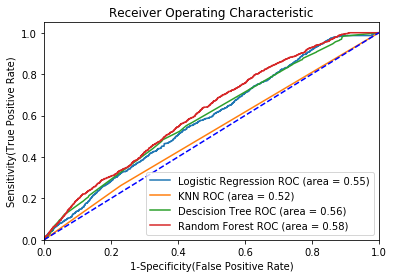

In [27]:
plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [{'label': 'Logistic Regression','model': logreg},
          {'label': 'KNN','model': knn},
          {'label': 'Descision Tree','model': dsc},
          {'label': 'Random Forest', 'model': rf},
          {'label': 'Random Forest', 'model': svm}
         ]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train_scaled, ytrain) # train the model
    y_pred=model.predict(X_test_scaled) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(ytest, model.predict_proba(X_test_scaled)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(ytest,model.predict(X_test_scaled))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

In [39]:
for m in models:
    model = m['model']
    print(m['label'],'recall score = ',recall_score(ytest,model.predict(X_test_scaled)).round(2))

Logistic Regression recall score =  0.59
KNN recall score =  0.26
Descision Tree recall score =  0.56
Random Forest recall score =  0.71


# **SVM**

In [10]:
C = [1, 10, 100, 1000]
svm_C_lin = {}

In [11]:
svm = SVC(random_state=0, class_weight='balanced', C = 1, kernel = 'linear')
svm_lin_1 = svm.fit(X_train_scaled, ytrain)
svm_C_lin['1'] = recall_score(ytest, svm_lin_1.predict(X_test_scaled)).round(4)

In [15]:
svm = SVC(random_state=0, class_weight='balanced', C = 10, kernel = 'linear')
svm_lin_10 = svm.fit(X_train_scaled, ytrain)
svm_C_lin['10'] = recall_score(ytest, svm_lin_10.predict(X_test_scaled)).round(4)

In [18]:
svm = SVC(random_state=0, class_weight='balanced', C = 100, kernel = 'linear')
svm_lin_100 = svm.fit(X_train_scaled, ytrain)
svm_C_lin['100'] = recall_score(ytest, svm_lin_100.predict(X_test_scaled)).round(4)

In [ ]:
svm = SVC(random_state=0, class_weight='balanced', C = 1000, kernel = 'linear')
svm_lin_1000 = svm.fit(X_train_scaled, ytrain)
svm_C_lin['1000'] = recall_score(ytest, svm_lin_1000.predict(X_test_scaled)).round(4)

In [28]:
# THE GRIDSEARCH RESULTS #
pkl_filename = 'models/svm_lin_100_20k.pkl'
# Open
gridcv_pkl = open(pkl_filename, 'wb')
# Insert object
pickle.dump(svm_lin_100, gridcv_pkl)
# Close
gridcv_pkl.close()

In [29]:
Xtrain.shape

(17092, 62)

In [27]:
svm_C_lin

{'1': 0.6746, '10': 0.6746, '100': 0.6737}

***

In [30]:
svm_C_g_rbf = {}

In [31]:
svm = SVC(random_state=0, class_weight='balanced', C = 1, gamma = 0.001, kernel = 'rbf')
svm_rbf_1_001 = svm.fit(X_train_scaled, ytrain)
svm_C_g_rbf['1_0.001'] = recall_score(ytest, svm_rbf_1_001.predict(X_test_scaled)).round(4)

In [46]:
svm = SVC(random_state=0, class_weight='balanced', C = 1, gamma = 0.0001, kernel = 'rbf')
svm_rbf_1_0001 = svm.fit(X_train_scaled, ytrain)
svm_C_g_rbf['1_0.0001'] = recall_score(ytest, svm_rbf_1_001.predict(X_test_scaled)).round(4)

In [55]:
svm = SVC(random_state=0, class_weight='balanced', C = 10, gamma = 0.01, kernel = 'rbf')
svm_rbf_10_01 = svm.fit(X_train_scaled, ytrain)
svm_C_g_rbf['10_0.01'] = recall_score(ytest, svm_rbf_10_01.predict(X_test_scaled)).round(4)

In [33]:
svm = SVC(random_state=0, class_weight='balanced', C = 10, gamma = 0.001, kernel = 'rbf')
svm_rbf_10_001 = svm.fit(X_train_scaled, ytrain)
svm_C_g_rbf['10_0.001'] = recall_score(ytest, svm_rbf_10_001.predict(X_test_scaled)).round(4)

In [41]:
svm = SVC(random_state=0, class_weight='balanced', C = 10, gamma = 0.0001, kernel = 'rbf')
svm_rbf_10_0001 = svm.fit(X_train_scaled, ytrain)
svm_C_g_rbf['10_0.0001'] = recall_score(ytest, svm_rbf_10_0001.predict(X_test_scaled)).round(4)

In [38]:
svm = SVC(random_state=0, class_weight='balanced', C = 100, gamma = 0.001, kernel = 'rbf')
svm_rbf_100_001 = svm.fit(X_train_scaled, ytrain)
svm_C_g_rbf['100_0.001'] = recall_score(ytest, svm_rbf_100_001.predict(X_test_scaled)).round(4)

In [49]:
svm = SVC(random_state=0, class_weight='balanced', C = 100, gamma = 0.0001, kernel = 'rbf')
svm_rbf_100_0001 = svm.fit(X_train_scaled, ytrain)
svm_C_g_rbf['100_0.0001'] = recall_score(ytest, svm_rbf_100_0001.predict(X_test_scaled)).round(4)

In [50]:
# THE GRIDSEARCH RESULTS #
pkl_filename = 'models/svm_rbf_100_0001_20k.pkl'
# Open
gridcv_pkl = open(pkl_filename, 'wb')
# Insert object
pickle.dump(svm_rbf_100_0001, gridcv_pkl)
# Close
gridcv_pkl.close()

In [56]:
svm_C_g_rbf

{'1_0.001': 0.6682,
 '10_0.001': 0.6967,
 '100_0.001': 0.6379,
 '10_0.0001': 0.6654,
 '1_0.0001': 0.6682,
 '100_0.0001': 0.6857,
 '10_0.01': 0.5579}

In [70]:
gamma = np.arange(0.0005,.001,0.0002)  
C = np.arange(5,55,10)
gamma

array([0.0005, 0.0007, 0.0009])

In [71]:
for c in C:
    for g in gamma:
        svm = SVC(random_state=0, class_weight='balanced', C = c, gamma = g, kernel = 'rbf')
        svm_rbf_cg = svm.fit(X_train_scaled, ytrain)
        print(c, g, recall_score(ytest, svm_rbf_cg.predict(X_test_scaled)).round(4))

5 0.0005 0.6756
5 0.0007 0.6866
5 0.0009 0.6903
15 0.0005 0.693
15 0.0007 0.6939
15 0.0009 0.6893
25 0.0005 0.6921
25 0.0007 0.6875
25 0.0009 0.6719
35 0.0005 0.6903
35 0.0007 0.6774
35 0.0009 0.6691
45 0.0005 0.6912
45 0.0007 0.6737
45 0.0009 0.659


***

In [52]:
svm_C_g_poly = {}

In [53]:
svm = SVC(random_state=0, class_weight='balanced', C = 1, gamma = 0.001, kernel = 'poly')
svm_poly_1_001 = svm.fit(X_train_scaled, ytrain)
svm_C_g_poly['1_0.001'] = recall_score(ytest, svm_poly_1_001.predict(X_test_scaled)).round(4)
svm_C_g_poly

{'1_0.001': 0.0129}

In [54]:
svm = SVC(random_state=0, class_weight='balanced', C = 1, gamma = 0.0001, kernel = 'poly')
svm_poly_1_0001 = svm.fit(X_train_scaled, ytrain)
svm_C_g_poly['1_0.0001'] = recall_score(ytest, svm_poly_1_001.predict(X_test_scaled)).round(4)
svm_C_g_poly

{'1_0.001': 0.0129, '1_0.0001': 0.0129}

In [33]:
svm = SVC(random_state=0, class_weight='balanced', C = 10, gamma = 0.001, kernel = 'poly')
svm_poly_10_001 = svm.fit(X_train_scaled, ytrain)
svm_C_g_poly['10_0.001'] = recall_score(ytest, svm_poly_10_001.predict(X_test_scaled)).round(4)

In [41]:
svm = SVC(random_state=0, class_weight='balanced', C = 10, gamma = 0.0001, kernel = 'poly')
svm_poly_10_0001 = svm.fit(X_train_scaled, ytrain)
svm_C_g_poly['10_0.0001'] = recall_score(ytest, svm_poly_10_0001.predict(X_test_scaled)).round(4)

In [38]:
svm = SVC(random_state=0, class_weight='balanced', C = 100, gamma = 0.001, kernel = 'poly')
svm_poly_100_001 = svm.fit(X_train_scaled, ytrain)
svm_C_g_poly['100_0.001'] = recall_score(ytest, svm_poly_100_001.predict(X_test_scaled)).round(4)

In [49]:
svm = SVC(random_state=0, class_weight='balanced', C = 100, gamma = 0.0001, kernel = 'poly')
svm_poly_100_0001 = svm.fit(X_train_scaled, ytrain)
svm_C_g_poly['100_0.0001'] = recall_score(ytest, svm_poly_100_0001.predict(X_test_scaled)).round(4)

In [51]:
svm_C_g_poly

{'1_0.001': 0.6682,
 '10_0.001': 0.6967,
 '100_0.001': 0.6379,
 '10_0.0001': 0.6654,
 '1_0.0001': 0.6682,
 '100_0.0001': 0.6857}

In [50]:
# THE GRIDSEARCH RESULTS #
pkl_filename = 'models/svm_rbf_100_0001_20k.pkl'
# Open
gridcv_pkl = open(pkl_filename, 'wb')
# Insert object
pickle.dump(svm_rbf_100_0001, gridcv_pkl)
# Close
gridcv_pkl.close()

In [ ]:
#grid = {'C': [1, 10, 100, 1000], 'kernel': ['linear']}
svm_C_lin = {}
for c in C:
    svm = SVC(random_state=0, class_weight='balanced',
               C = c, kernel = 'linear')
    svm_model = svm.fit(X_train_scaled, ytrain)
    svm_C_lin[c] = recall_score(ytest, svm_model.predict(X_test_scaled)).round(4)

In [42]:
svm_model_test = svm_test.fit(X_train_scaled, ytrain)

In [44]:
svm_model_test.score(X_test_scaled, ytest)

0.49368273280299485

In [12]:
recall_score(ytest,svm_lin_1.predict(X_test_scaled)).round(2)

0.67

In [72]:
X.describe()

,age,signup_flow,gender_female,gender_male,gender_other,signup_method_basic,signup_method_facebook,language_ca,language_cs,language_da,...,first_browser_2_ie,first_browser_2_other,signup_app_2_android,signup_app_2_ios,signup_app_2_moweb,secs_elapsed_mean,secs_elapsed_std,num_different_devices,num_different_actions,num_sessions
count,21366.000000,21366.000000,21366.000000,21366.000000,21366.000000,21366.000000,21366.000000,21366.0,21366.0,21366.000000,...,21366.000000,21366.000000,21366.000000,21366.000000,21366.000000,21366.000000,21366.000000,21366.000000,21366.000000,21366.000000
mean,34.985070,2.879481,0.392680,0.347983,0.001872,0.720584,0.275859,0.0,0.0,0.000094,...,0.064167,0.191987,0.028644,0.083263,0.019845,27959.947576,80440.038933,1.335112,15.803005,79.528690
std,11.027706,7.609049,0.488358,0.476342,0.043229,0.448723,0.446956,0.0,0.0,0.009675,...,0.245057,0.393872,0.166807,0.276286,0.139469,23290.704425,64484.377775,0.574055,8.322760,81.857238
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,12940.882327,31895.030971,1.000000,10.000000,25.000000
50%,32.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,21505.000000,63010.086238,1.000000,14.000000,52.000000
75%,39.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,34956.178846,111723.601216,2.000000,20.000000,103.000000
max,85.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,190000.000000,313371.525965,6.000000,44.000000,472.000000
